<center>
<font size=5> 
<h1> 
RAMAKRISHANA MISSION VIVEKANANDA 
<br > 
EDUCATIONAL AND RESEARCH INSTITUTE 
</h1>
BELUR MATH, HOWRAH, 711202 WB  
<br ><br ><br >
</font>
</center>
<center>
<font size=6> 
 Institute Name : SCHOOL OF MATHEMATICAL SCIENCE <br >
 DEPARTMEN NAME : COMPUTER SCIENCE 
</font>
<br >
</center>

>>>> # Name : JEETU KUMAR
>>>> ### Registration No./Roll No. : B18732
>>>> ### Program Name : M.Sc. Big Data Analytics
>>>> ### Semester : 2nd, January - June 2019
>>>> ### Paper : Optimization Algorithm 
>>>> ### Paper Code: CS326
>>>> ## __End Semester Project Work__
>>>> ### Instructor: Br. Mirnmay MJ



---
---
---
___


<center>
<font size=6>    
<em>
Optimization Of function <br >
Using Newton Method $\&$ DFP Method <br >
With Magic Of Line Search <br >
</em>
</font>
</center>

---
___
---
---
___

# Problem Statement ::

Implement and create understanding of the 'Newton method' and 'Davidon Fletcher Powell(DFP) method' algoritms to optimize the function. Implement Line Seacrch to get step-size at each iteration (Assuming that function is cntionuous and differentiable). Generate the minimization result for test case function $f$ and analyse the results, where $f$ is defined  as follows:
<br>
<font size=3>
Equation (1)
</font>
<br>
\begin{align*}\label{eq: eq1}
& f : \mathbb{R}^{2} \to \mathbb{R}\\
& f(x, y) =(x^2 -y)^2+(1-x)^2
\end{align*}
<br >
<font size=3> 
Problem ::<br >
Solve : min $f(X)=(x^2 -y)^2+(1-x)^2$; $X=(x, y)$ by (i) 'Newton method' and (ii) 'Davidon Fletcher Powell(DFP) method'.Generate the solution assuming starting point is $(-1, -1)$ for both method. Compare the results of two methods in terms of convergence rate, solutions, number of iterations etc. .
</font><br ><br >
To complete the above assignment we will use <strong>Python</strong> in order to implement the 'Newton method', 'Davidon Fletcher Powell(DFP) method' and 'Line Search' algoritm and generate the experimental results.<br >
For Line search we will implement three differant Line Search (i) No Line Search (take fixed step-size at each iteration), (ii) Wolfe-Powell Algorithm (with update rule of Goldstein Algorithm), (iii) Wolfe-Powell Algorithm.<br><br>
<font size=6>
 Let Start By Importing The required library
</font>
<br>
<br>

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm as L2

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

<font size=4> 
Lets define the objective function and make the plot of the function<br >
Solve : min $f(X)=(x^2 -y)^2+(1-x)^2$; $X=(x, y); X\in \mathbb{R}^{2}$
</font>

In [2]:
def func(V):
    return (((V[0])**2-V[1])**2+(1-V[0])**2)

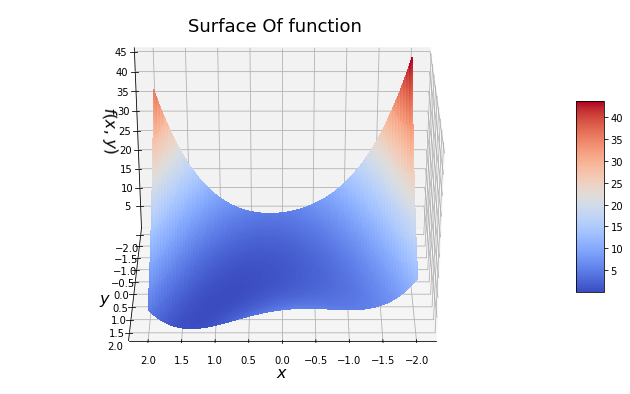

In [3]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x0, y0 = np.meshgrid(x, y)
z0=func((x0, y0))
fig = plt.figure(figsize=(12,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x0, y0, z0, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=7)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel(r"$f$($x$, $y$)", fontsize=16, rotation=60)
ax.set_title('Surface Of function',fontsize=18)
ax.view_init(azim=90)

## Lets define the ploting theme

In [4]:
def mythem2D(xa, ya, Anp=0, txs=12, scs=30, fgS=(12,7)):
    fig = plt.figure(figsize=(fgS))
    ax=plt.axes()
    ax.plot(xa, ya, color='b')
    if(Anp==1):
        for i in range(0, len(xa)):
            ax.annotate(i, (xa[i], ya[i]), size=txs, color='r')
    ax.scatter(xa, ya, s=50, color='g', alpha=0.8)
    return (ax)

In [5]:
def mythemCntr(xa, ya):
    x1, y1=np.linspace(-0.2+min(xa), 0.2+max(xa), 100), np.linspace(-0.2+min(ya), 0.2+max(ya), 100)
    x1, y1 = np.meshgrid(x1, y1)
    z1 = func((x1, y1))
    cp=plt.contourf(x1, y1, z1, cmap=cm.coolwarm)
    cbr=plt.colorbar(cp)
    cbr.set_label(label="alpha of lavel set", fontsize=16)
    
    plt.title('Contour plot of surface', fontsize=16)
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14, rotation=360)
    return(cp)

In [6]:
def mythem3D(V, vl, txs=12, scs=30, fgS=(15, 5)):
    xa, ya=V[:,0], V[:,1]
    x1, y1=np.linspace(-0.2+min(xa), 0.2+max(xa), 100), np.linspace(-0.2+min(ya), 0.2+max(ya), 100)
    x1, y1 = np.meshgrid(x1, y1)
    z1 = ((x1**2)-y1)**2+(1-x1)**2
    
    fig = plt.figure(figsize=(fgS))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x1, y1, z1, rstride=1, cstride=1, color='g', alpha=0.3)
    ax.scatter(xa, ya, vl, s=scs,  alpha=0.9, color='r')
    ax.plot(xa, ya, vl, color='k')
    for i in range(len(xa)): 
        ax.text(xa[i],ya[i],vl[i],  '%s' % (str(i)), size=txs, zorder=1, color='b')
    
    ax.set_xlabel('$x$', fontsize=16, rotation=60)
    ax.set_ylabel('$y$', fontsize=16, rotation=150)
    ax.set_zlabel(r"$f$($x$, $y$)", fontsize=16, rotation=-60)
    return(ax)

In [7]:
def themName(ax, NP={}):
    nmP={'ttl':'Title', 'xlbl':'Xlabel', 'ylbl':'Ylabel', 'rtn':-4, 'TP':'2D'}
    if(bool(NP)):
        for key in NP.keys():
            nmP[key]=NP[key]
    if(nmP['TP']=='3D'):
        if(nmP['ttl']!='Title'):
            ax.set_title(nmP['ttl'], fontsize=18, rotation=nmP['rtn'])
    else:
        if(nmP['xlbl']!='Xlabel'):
            ax.set_xlabel(nmP['xlbl'],fontsize=16)
        if(nmP['ylbl']!='ylabel'):
            ax.set_ylabel(nmP['ylbl'], fontsize=16)
        if(nmP['ttl']!='Title'):    
            ax.set_title(nmP['ttl'], fontsize=18)

<font size=4> 
Lets define the gradient and hessian of the function. Let $X=(x, y)$<br >
<br>
<font size=3>
Equation (2)
</font>
<br >
\begin{align*}\label{eq: eq2}
& g : \mathbb{R}^{2} \to \mathbb{R}^{2}\\
& g(X) =\left(\frac{\partial f(X)}{\partial x}, \frac{\partial f(X)}{\partial y}\right)\\
& g(x, y)=(4x^3-4xy+2x-2, -2x^2+2y)\\ \\
\end{align*} 
<br>
<font size=3>
Equation (3)
</font>
<br >
\begin{align*}\label{eq: eq3}
& H(X)=
\begin{bmatrix}
\frac{\partial f^2(X)}{\partial x^2} &  \frac{\partial f^2(X)}{\partial y \partial x} \\
\frac{\partial f^2(X)}{\partial x \partial y} &  \frac{\partial f^2(X)}{\partial y^2} \\
\end{bmatrix}\\ \\
& H(X) =
\begin{bmatrix}
12x^2-4y+2 &  -4x \\
-4x &  2
\end{bmatrix}
\end{align*}    


In [8]:
def gradf(V):
    return (np.array([4*(V[0]**3)-4*V[0]*V[1]+2*V[0]-2, -2*(V[0]**2)+2*V[1]]))

In [9]:
def hesf(V):
    return (np.array([[12*(V[0]**2)-4*V[1]+2, -4*V[0]], [-4*V[0], 2]]))

## Lets see the contour plot of function

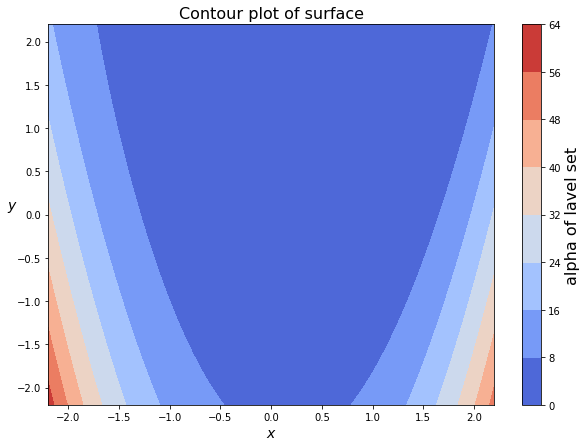

In [10]:
plt.figure(figsize=(10,7))
cp=mythemCntr(x, y)
plt.show()

<font size=5> 
Lets define the line search algorithms:
</font><br >
Let in $k_{th}$ iteration $X_{k}$ be the point and $d_{k}$ be the direction to move then the update will be $X_{k+1}=X_{k}+\alpha d_{k}$, where $\alpha$ is allowed setp-size at $X_{k}$ in the direction of  $d_{k}$. We will get $\alpha$, using Line Search and $d_{k}$ using Direction Search.<br >
<font size=3>
Equation (4)
</font><br >
\begin{equation}\label{eq: eq4}
f(X_{k}+\alpha d_{k})\leq f(X_{k})+\rho \alpha g_{k}^{T}d_{k}
\end{equation}<br >
<font size=3> 
Equation (5)
</font><br >
\begin{equation}\label{eq: eq5}
g_{k+1}^{T}d_{k} \geq \sigma g_{k}^{T}d_{k}; \sigma \in (\rho , 1)
\end{equation}<br >
where $f(X_{k}), \ g(X_{k}), \ d_{k}$ are function value, gradient, and diorection at $k_{th}$ iteration respectively; $\rho \in (0,\ 1) ,\ \sigma$ are line search parameters, and $\alpha$ is step size.<br >

## *Line Search Algorithm 1*
Here we will use fixed step-size at every iteration.In general fixing an arbitray $0\leq \alpha < \infty$ will not suite to every iteration always; So just to generate test case we are doing this exprement to see the results and behaviour convergence. Here chossing fixed $\alpha$ is completely crucial; for our purpose we will chosse $\alpha=0.10$ for both algorithm 'Newton method' and 'Davidon Fletcher Powell(DFP) method' although for 'Newton method' $0<\alpha \leq 0.5$ suits to every iteration for start point $X_{0}=(x_{0}, y_{0})$ for $-1\leq x_{0} \leq 5$,  $-1\leq y_{0} \leq 5$ and 
for 'DFP' $0<\alpha \leq 0.1$ suits to every iteration for start point $X_{0}=(x_{0}, y_{0})$ for $-1\leq x_{0} \leq 2$,  $-1\leq y_{0} \leq 2$.<br >
## *Line Search Algorithm 2*
<em>
<font size=5> 
 Wolfe-Powell Algorithm (with update rule of Goldstein Algorithm)<br >
Rules and Steps Of Algoroithm :
</font>
</em><br >
<font size=3>
<strong>Step 0 : </strong><br>
Choose initial data $X_{k}, \ \alpha_{1}=0, \ \alpha_{2}=\infty, \ \alpha>0$, and compute $f_{1}(X_{k})=f(X_{k}), \ f_{1}^{'}(X_{k})=g_{k}^{T}d_{k}$ <br >
<strong>Step 1 : </strong><br>
Compute :  $f(X_{k})=f(X_{k}+\alpha d_{k})$<br >
<strong>Step 2 : </strong><br>
Chek? Equation (1) : <br>
If Yes :: Go to <strong>Step 3</strong> <br>
Else :: Do $\alpha_{2}=\alpha$, $\alpha=\frac{\alpha_{1}+\alpha_{2}}{2}$; Go to <strong>Step 1</strong><br >
<strong>Step 3 : </strong><br>
Compute : $g(X_{k+1})=g(X_{k}+\alpha d_{k}), \ f^{'}(X_{k+1})=g(X_{k+1})^{T}d_{k}$; Go to <strong>Step 4</strong> <br>
<strong>Step 4 : </strong><br>
Chek? Equation (2) : <br>    
If Yes :: Return $\alpha_{k+1}=\alpha$ <strong>STOP</strong> <br>
Else :: Do $\alpha_{1}=\alpha$;  if $\alpha_{2}<\infty \ : \ \alpha=\frac{\alpha_{1}+\alpha_{2}}{2}$, else $\alpha=t\alpha_{1}$, where $t>0$ a integer; Go to <strong>Step 1</strong><br >
</font>
In implementation default value of $\rho=0.15, \ \sigma=0.30, \ maxiter=\# \ of \ maximum \ iteration=30, \ error=\epsilon=10^{-4}$ is assigned which may be changed if required by passing as parameter value at the time of call (invocation). <br >

## Implement the Line Search Algorithm 2

In [11]:
#def MdLineSearchWP(X, d, mxiter=30, rho=0.15, sigma=0.30, err=0.0001):
def MdLineSearchWP(X, d, pd={}):
    dpd={'mxiter':30, 'rho':0.15, 'sigma':0.30, 'err':10**-4}
    if(bool(pd)):
        for key in pd.keys():
            dpd[key]=pd[key]
    
    al1, al2, al=0, np.inf, 0.5
    c1, c2=dpd['rho'], dpd['sigma']
    gf1=gradf(X)
    f1, f1d=func(X), gf1.dot(d)
    
    i, j, mxiter, err=0, 0, dpd['mxiter'], dpd['err']
    
    while(i<mxiter):
        i+=1
        f=func(X+al*d)
        g=gradf(X+al*d)
        fd=g.dot(d)
        
        #condition1
        if(f>f1+c1*al*f1d):
            al2=al
            altemp=(al1+al2)/2
            if(abs(al-altemp)<err):
                j=mxiter
            
            al=altemp
            
        #condition2
        elif(fd<c2*f1d):
            al1, f1, f1d= al, f, fd
            if(al2<np.inf):
                altemp=(al1+al2)/2
            else:
                altemp=2*al
            if(abs(al-altemp)<err):
                j=mxiter
            
            al=altemp

        #complement of both condition1 and condition2 holds 
        else:
            return (al)
            break;
        if(j==mxiter):
            return (al)
            break;
        
        if(i==mxiter):
            print("Algorithm failed to converge in LineSearch. You may try by increasing " 
                  "'mxiter' maXimum of iteration for Line search")
            return (al)

## *Line Search Algorithm 3*
<em>
<font size=5> 
 Wolfe-Powell Algorithm<br >
Rules and Steps Of Algoroithm :
</font>
</em><br >
<font size=3>
<strong>Step 0 : </strong><br>
Choose initial data $X_{k}, \ \alpha_{1}=0, \ \alpha_{2}=\infty, \ \alpha>0$, and compute $f_{1}=f(X_{k}), \ f_{1}^{'}=g_{k}^{T}d_{k}$ <br >
<strong>Step 1 : </strong><br>
Compute $f=f(X_{k}+\alpha d_{k})$<br >
<strong>Step 2 : </strong><br>
Chek? Equation (1) : <br>
If Yes :: Go to <strong>Step 3</strong> <br>
Else :: Compute $\hat{\alpha} \ : \ \hat{\alpha}=\alpha_{1}+\frac{1}{2}\frac{\alpha-\alpha_{1}}{1+\frac{f_{1}-f}{(\alpha - \alpha_{1})f_{1}^{'}}}$;  Do $\alpha_{2}=\alpha$, $\alpha=\hat{\alpha}$; Go to <strong>Step 1</strong><br >
<strong>Step 3 : </strong><br>
Compute $g=g(X_{k}+\alpha d_{k}), \ f^{'}=g^{T}d_{k}$<br >; Go to <strong>Step 4</strong> <br>
<strong>Step 4 : </strong><br>
Chek? Equation (2) : <br>    
If Yes :: Return $\alpha_{k+1}=\alpha$ <strong>STOP</strong> <br>
Else ::Compute $\hat{\alpha} \ : \ \hat{\alpha}=\alpha+\frac{(\alpha-\alpha_{1})f^{'}}{f_{1}^{'}-f^{'}}$; Do $\alpha_{1}=\alpha, \ f_{1}=f, \ f_{1}^{'}=f^{'}$; Go to <strong>Step 1</strong><br >
</font>
In implementation default value of $\rho=0.15, \ \sigma=0.30, \ maxiter=\# \ of \ maximum \ iteration=30, \ error=\epsilon=10^{-4}$ is assigned which may be changed if required by passing as parameter value on call (invocation) time. <br >

## Implemention of the Line Search Algorithm 3
<br>

In [12]:
def upd1(al1, al, f1, f, f1d):
    temp=1+((f1-f)/((al-al1)*f1d))
    temp1=al1+(0.5*((al-al1)/temp))
    return (temp1)

In [13]:
def upd2(al1, al, f1d, fd):
    temp=((al-al1)*fd)/(f1d-fd)
    temp1=al+temp
    return (temp1)

In [14]:
def LineSearchWP(X, d, pd={}):
    dpd={'mxiter':30, 'rho':0.15, 'sigma':0.30, 'err':10**-4}
    if(bool(pd)):
        for key in pd.keys():
            dpd[key]=pd[key]
    
    al1, al2, al=0, np.inf, 0.5
    c1, c2=dpd['rho'], dpd['sigma']
    gf1=gradf(X)
    f1, f1d=func(X), gf1.dot(d)
    
    i, j, mxiter, err=0, 0, dpd['mxiter'], dpd['err']
    
    while(i<mxiter):
        i+=1
        f=func(X+al*d)
        g=gradf(X+al*d)
        fd=g.dot(d)
        
        #condition1
        if(f>f1+c1*al*f1d):
            altemp=upd1(al1, al, f1, f, f1d)
            if(abs(al-altemp)<err):
                j=mxiter
            
            al2=al
            al=altemp
            
        #condition2
        elif(fd<c2*f1d):
            altemp=upd2(al1, al, f1d, fd)
            if(abs(al-altemp)<err):
                j=mxiter
                
            al1, f1, f1d= al, f, fd
            al=altemp

        #complement of both condition1 and condition2 holds 
        else:
            return (al)
            break;
        if(j==mxiter):
            return (al)
            break;
        
        if(i==mxiter):
            print("Algorithm failed to converge in Line-Search. You may try by increasing "
                  "'mxiter' maXimum of iteration for Line search")
            return (al)

 ## *Newton Method*
<font size=3>
<em>
Newton Method to find directon at every iteration and optimize the function <br >
Rules and Steps Of Algoroithm :
</em><br >
<strong>Step 0 : </strong><br>
Choose initial data $X_{0}$; Ste $\epsilon=some small number, \ k=0$<br >
<strong>Step 1 : </strong><br>
Compute : $g_{k}=g(X_{k}), \ H_{k}=H(X_{k})$ <br >
Compute : $d_{k}$: $d_{k}=-H_{k}^{-1}g_{k}$; $0\leq \alpha < \infty$ : $\alpha = argmin \ f=f(X_{k}+\alpha d_{k})$; Do $X_{k+1}=X_{k}+\alpha d_{k}$<br >
<strong>Step 2 : </strong><br>
Chek? $||f(X_{k+1})-f(X_{k})|| < \epsilon$ : <br>
If Yes :: Return $solution=X_{k+1}$ <strong>STOP</strong> <br>
Else :: Do $k\leftarrow k+1$; Go to <strong>Step 1</strong> <br >
</font>
In implementation default value of $maxiter=\# \ of \ maximum \ iteration=30, \ error=\epsilon=10^{-4}$ is assigned and default 'Line Search' function is "fixed step-size=0.10 (passed as LSf='1')" which can be changed if required by passing as parameter value on call (invocation) time. <br >
NOTE : Here we have implemented $||f(X_{k+1})-f(X_{k})|| < \epsilon$ as stopig criterion, one can also change it to $||g(X_{k+1})-g(X_{k})|| < \epsilon$ or $||g(X_{k+1})|| < \epsilon$ as stoping criterion. <br >

## Implementation of Newton Method
<br>

In [15]:
#def newton(X, mxiter=30, err=0.001, miter_LS=30,rho_LS=0.15, sigma_LS=0.30, err_LS=10**-4):
def newton(X, mxiter=30, err=0.0001, LSf='0', LSP={}):
    l=[]
    vals = []
    ovfs = []
    
    i=0
    while (i < mxiter):
        i += 1
        vals.append(X)
        ovfs.append(func(X))
        d=inv(hesf(X)).dot(gradf(X))
        l.append(np.array([X, -d]))
        if(LSf=='1'):
            step=0.10
        else:
            if(bool(LSP)):
                step=LSf(X, -d, LSP)
            else:
                step=LSf(X, -d) 
        
        temp = X-step*d
        if (np.abs(func(temp)-func(X))<err):
            break;
        X=temp
    
    if(i==mxiter):
        print("Algorithm failed to converge in. You may try by increasing 'maXiter'"
              " maXimum of iteration")
    return (np.array(vals), np.array(ovfs), i, np.array(l))

 ## *DFP Method*
<em>
<font size=3> 
DFP Method to find directon at every iteration and optimize the function <br >
Rules and Steps Of Algoroithm :
</font>
</em><br >
<font size=3>
<strong>Step 0 : </strong><br>
Ste $\epsilon=$some small number, $n=$Dimension of function$=\#$ variable in function; $k=0, \ j=0$; Choose inital data $X_{0}$; Compute : $Y_{j}=X_{k}, \ B_{j}=$some positive definite matrix(or $H(X_{0})^{-1}$ or $I$ identity matrix) <br >
<strong>Step 1 : </strong><br> 
Compute : $g_{j}=g(Y_{j})$ <br >
Check? : $||g_{j}||\leq \epsilon$
If Yes :: Return $solution=Y_{j}$<br >
Else :: Compute : $d_{k}$: $d_{k}=-B_{J}g_{k}$; $0\leq \alpha < \infty$ : $\alpha = argmin \ f=f(Y_{j}+\alpha d_{j})$; Do $Y_{j+1}=Y_{j}+\alpha d_{j}$; if $j<(n-1)$ Go to <strong>Step 2</strong>, if j=(n-1) do $Y_{0}=X_{k+1}=Y_{n}, \ k \leftarrow k+1, \ j \leftarrow 0$, Repeat <strong>Step 1</strong> <br >
<strong>Step 2 : </strong><br>
Chek? $||f(Y_{j+1})-f(Y_{j})||\leq \epsilon$ : <br>
If Yes :: Return $solution=Y_{j+1}$ <strong>STOP</strong> <br>
Else :: Compute : $B_{j+1}$, such as $B_{j+1}=B_{j}+\frac{p_{j}p_{j}^{T}}{p_{j}^{T}q_{j}}-\frac{B_{j}q_{j}q_{j}^{T}B_{j}}{q_{j}^{T}B_{j}q_{j}}$ where $p_{j}\leftarrow \alpha d_{j}=Y_{j+1}-Y_{j}$ and $q_{j}\leftarrow g_{j+1}-g_{j}$; Do $j\leftarrow j+1$, Go to <strong>Step 1</strong><br >
</font>
We remark here that the inner loop of the foregoing algorithm resets the procedure every n steps (whenever$j =(n-1)$ at <strong>Step 1</strong>). Any variant that resets every $n^{'} < n$ inner iteration steps is called a partial quasi-Newton method. <br >
In implementation default value of $maxiter=\# \ of \ maximum \ iteration=30, \ error=\epsilon=10^{-4}$ is assigned and default 'Line Search' function is "fixed step-size=0.10 (passed as LSf='1')" which can be changed if required by passing as parameter value on call time.<br>

## Implementation of DFP Mothod
<br>

In [16]:
def hessupd(Bi, yi, yj):
    p=yj-yi
    q=gradf(yj)-gradf(yi)
    r1=np.dot(p,q)
    r2=np.dot(q, np.dot(Bi, q))
    t1=np.outer(p, p)/r1
    t2=np.dot(np.dot(Bi, np.outer(q, q)), Bi)/r2
    return (Bi+t1-t2)

In [17]:
#def newton(X, mxiter=30, err=0.001, miter_LS=30,rho_LS=0.15, sigma_LS=0.30, err_LS=10**-4):
def DFP(X, mxiter=30, DIH=1, dimf=2, err=0.0001, LSf='0', LSP={}):
    valsX = [X]
    l=[]
    vals = []
    ovfs = []
    if(DIH==0):
        Bi=B0=inv(hesf(X))
    elif(DIH==1):
        Bi=B0=np.identity(dimf, dtype = float)
    Y=X
    i, j, k=0, 1, 1
    while (i < mxiter):
        i += 1
        vals.append(Y)
        ovfs.append(func(Y))
        gr=gradf(Y)
        if(L2(gr)<err):
            break;
        
        d=np.dot(Bi, gr)
        l.append(np.array([Y, -d]))
        if(LSf=='1'):
            step=0.10
        else:
            if(bool(LSP)):
                step=LSf(Y, -d, LSP)
            else:
                step=LSf(Y, -d) 
        
        temp = Y-step*d
        if (np.abs(func(temp)-func(Y))<err):
            break;
            
        if(j==dimf):
            k+=1
            j=1
            Bi=B0
            X=temp
            Y=X
            valsX.append(X)
            
        elif(j<dimf):
            Bj=hessupd(Bi, Y, temp)
            j+=1
            Bi=Bj
            Y=temp
    if(i==mxiter):
        print("Algorithm failed to converge in. Increasing 'maXiter' maXimum of iteration may give better result")        

    return (np.array(valsX), np.array(vals), np.array(ovfs), i, np.array(l))

___
---
___

<font size=8>
 Lets check the results!
</font>

---
___

# Experiment 1
<br >
<font size=4>
Comperision and analysis of results from "DFP" and "Newton" Method starting at $V=X=(-1,-1)$ with (with Line-Search <em>Algorithm 1</em>) default setup ::<br> <br>
</font>

___

<font size=6>
Result Of 'Newton Method'
</font>

Algorithm failed to converge in. You may try by increasing 'maXiter' maXimum of iteration
iteration : 50 , final: [0.93283397 0.8534286 ]


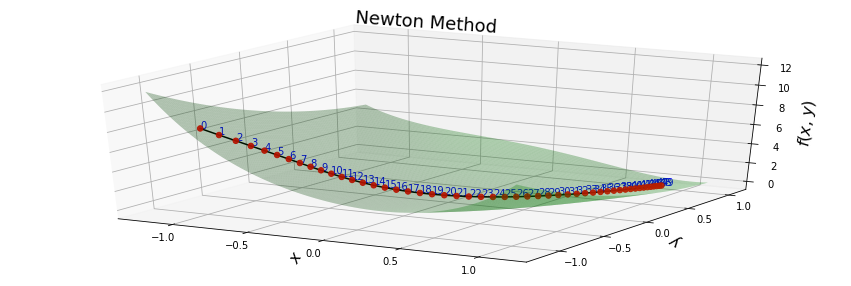

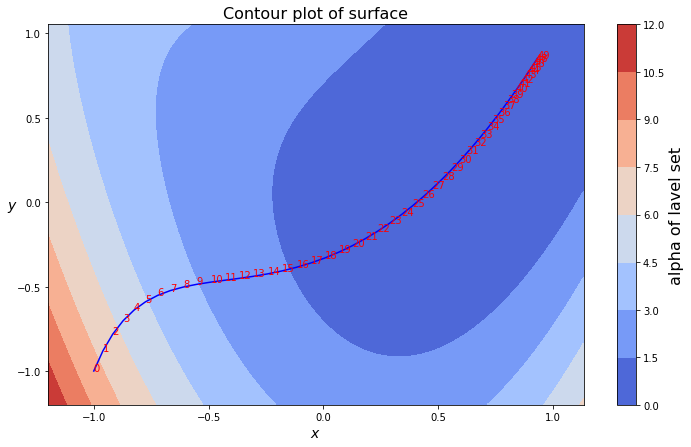

In [18]:
nmPN={'ttl':'Newton Method', 'TP':'3D'}
nmPD={'ttl':'DFP Method', 'TP':'3D' }
start =np.array([-1, -1])
valN, ovfN, itersN, l0N = newton(start, 50, LSf='1')
print('iteration :',itersN, ', final:', valN[-1])
ax=mythem3D(valN, ovfN, 10)
ax=themName(ax, nmPN)
cp=mythem2D(valN[:,0], valN[:,1], 1, 10)
cp=mythemCntr(valN[:,0], valN[:,1])
plt.show()

___

<font size=6>
Result Of 'DFP Method' for $B_{0}=I$
</font>

iteration : 45 , final: [0.96681009 0.91962114]


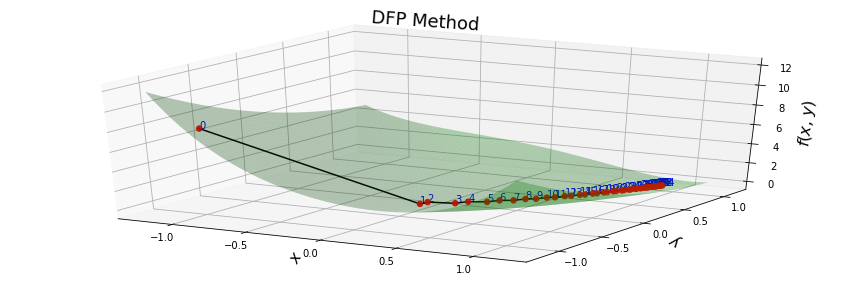

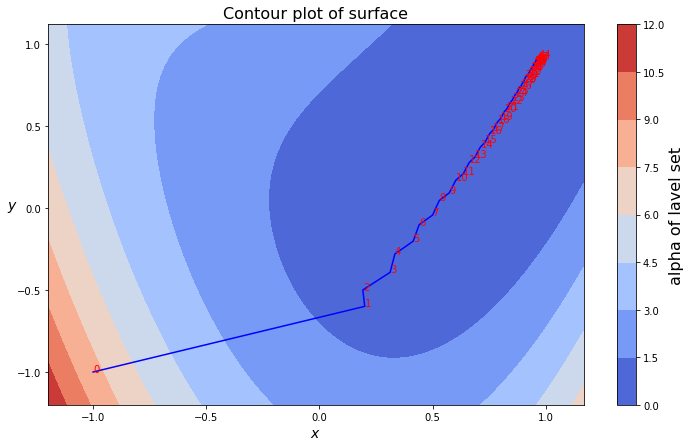

In [19]:
valxD, valD, ovfD, itersD, l0D = DFP(start, 50, LSf='1')
print('iteration :',itersD, ', final:', valD[-1])
ax=mythem3D(valD, ovfD, 10)
ax=themName(ax, nmPD)
cp=mythem2D(valD[:,0], valD[:,1], 1, 10)
cp=mythemCntr(valD[:,0], valD[:,1])
plt.show()

___

<font size=3>
We can see that due to small step-size $\alpha=0.1$ convergence of methods are in very long-run. Even "Newton Method" suffers with small-samll moves, it also failed to converge with 50 iteration, and it gives solution $X^{*}=(0.93283397, 0.8534286)$; But DFP converges at 45 and give and gives solution $X^{*}=(0.9676083,  0.92264127)$ with better then solution from "Nweton Method" as actual solution is $X^{**}=(1, 1)$.<br >
The thing which makes here "DFP" to perform better is that at very first iteration it lands <em><strong>to inner most contour, where the change in gradient becomes very less as gradient(norm of gradient) itself is of small magnidute and very colse to Zero</strong></em>. After that it starts <strong>Zig-Gag-ing</strong>. <em>We can see this phenomenan from contour plot itself, "Newton Method reachs to inner most contour at $16_{th}$ iteration while 'DFP Method' after $1_{st}$ iteration.</em><br>
Here also we can note that moves(path) of "Newton Method" <em>smooth</em>, but not for 'DFP'. <strong>YES!</strong> if step-size $\alpha$ is small then due 'Polynomial Approximationa' moves of 'Newton Method' have to be smooth.
</font>

___
---

# Experiment 2
<br >
<font size=4>
Comperision and analysis of results for "DFP" and "Newton" Method starting at $V=X=(-1,-1)$ with Line-Search Algorithm  "Wolfe-Powell Algorithm (with update rule of Goldstein Algorithm)", <em>Algorithm 2 </em> :: <br>  
Here We will see the behaviour of "DFP Method" using $B_{0}=I$ and $B_{0}=H(X_{0})^{-1}$ both.<br ><br >
</font>

___

<font size=6>
Result Of 'Newton Method'
</font>

iteration : 6 , final: [0.99816806 0.99616171]


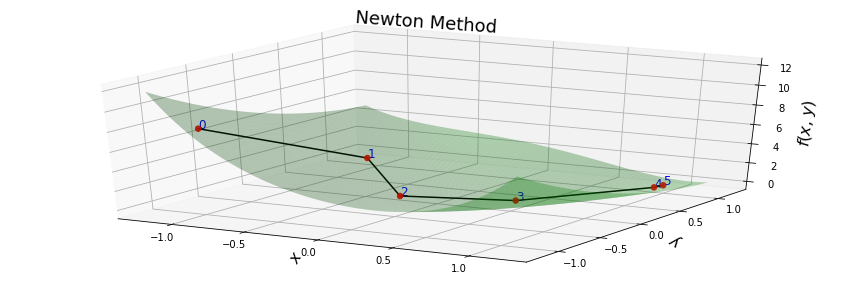

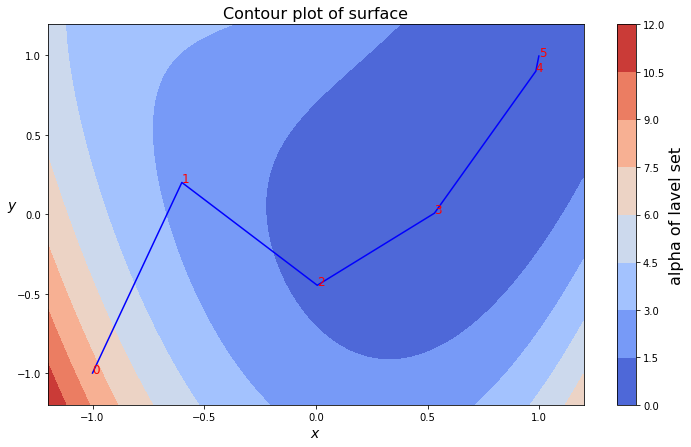

In [20]:
valN, ovfN, itersN, l0N = newton(start, LSf=MdLineSearchWP)
print('iteration :',itersN, ', final:', valN[-1])
ax=mythem3D(valN, ovfN)
ax=themName(ax, nmPN)
cp=mythem2D(valN[:,0], valN[:,1], 1)
cp=mythemCntr(valN[:,0], valN[:,1])
plt.show()

___

<font size=6>
Result Of 'DFP Method' for $B_{0}=I$
</font>

iteration : 9 , final: [0.99210328 0.98319073]


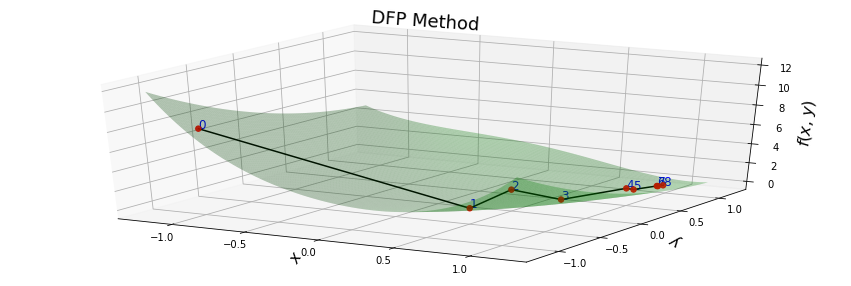

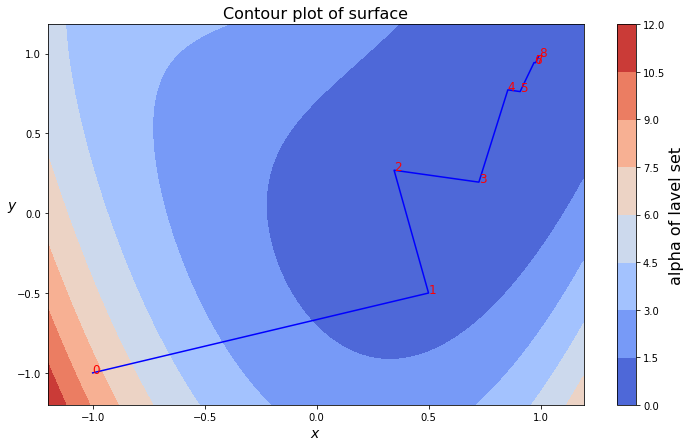

In [21]:
valxD, valD, ovfD, itersD, l0D = DFP(start, LSf=MdLineSearchWP)
print('iteration :',itersD, ', final:', valD[-1])
ax=mythem3D(valD, ovfD)
ax=themName(ax, nmPD)
cp=mythem2D(valD[:,0], valD[:,1], 1)
cp=mythemCntr(valD[:,0], valD[:,1])
plt.show()

___

<font size=6>
Result Of 'DFP Method' for $B_{0}=H(X_{0})^{-1}$
</font>

iteration : 9 , final: [1.01557641 1.02740522]


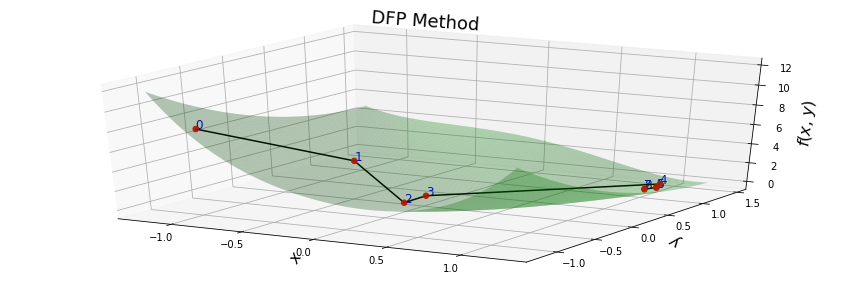

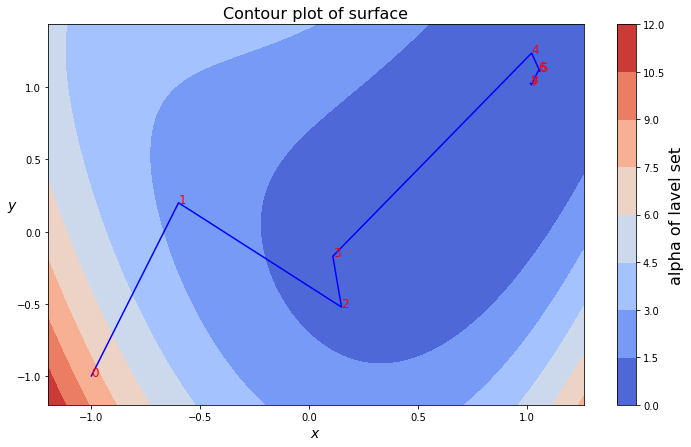

In [22]:
valxD, valD, ovfD, itersD, l0D = DFP(start, DIH=0, LSf=MdLineSearchWP)
print('iteration :',itersD, ', final:', valD[-1])
ax=mythem3D(valD, ovfD)
ax=themName(ax, nmPD)
cp=mythem2D(valD[:,0], valD[:,1], 1)
cp=mythemCntr(valD[:,0], valD[:,1])
plt.show()

___

<font size=3>
Here we can see that in terms of number of iteration of ternds have become oppsite in comparision to last experiment. <strong>"Newton Method" have converged in 6 iteration while "DFP Method" have converged in 9 iiteration in both cases</strong>. And solution from (i) 'Newton Method' is $X^{*}=(0.99816806,  0.99616171)$, (ii) "DFP Method with $B_{0}=I$" is $X^{*}=(0.99354262, 0.98346028)$ and solution from (iii) "DFP Method with $B_{0}=H(X_{0})^{-1}$" is $X^{*}=(1.01399333, 1.03156893)$, although solutions are different but theire distance from actual solution are very-low and almost same.<br>
More or less we can say that result from 'Newton Method' is better than "DFP Method with "DFP Method with $B_{0}=I$"; And results from "DFP Method" with $B_{0}=H(X_{0})^{-1}$", is better than results from 'Newton Method'.<br >
We can see that 'Newton Method' have entred to inner most contour in 2 iteration and it is straight in side inner most contour(No Zig-Zag). While "DFP Method with $B_{0}=I$" have entredto inner most contour in 1 iteration, but degree of <strong>"Zig-Zag"</strong> in side inner most contour is very high; And "DFP Method with $B_{0}=H(X_{0})^{-1}$" have entred to inner most contour in 2 iteration, although initialy it has less degree of "Zig-Zag" in inner-most contour but high degree of "Zig-Zag" nearer to solution (at the end).
</font>

___
---
___


# Experiment 3
<br >
<font size=4>
Comperision and analysis of results for "DFP" and "Newton" Method starting at $V=X=(-1,-1)$ with Line-Search Algorithm  "Wolfe-Powell Algorithm", <em>Algorithm 3 </em> :: <br>  
Here also, We will see the behaviour of "DFP Method" using $B_{0}=I$ and $B_{0}=H(X_{0})^{-1}$ both. <br ><br>
</font>

___

<font size=6>
Result Of 'Newton Method'
</font>

iteration : 6 , final: [0.99953814 0.99889292]


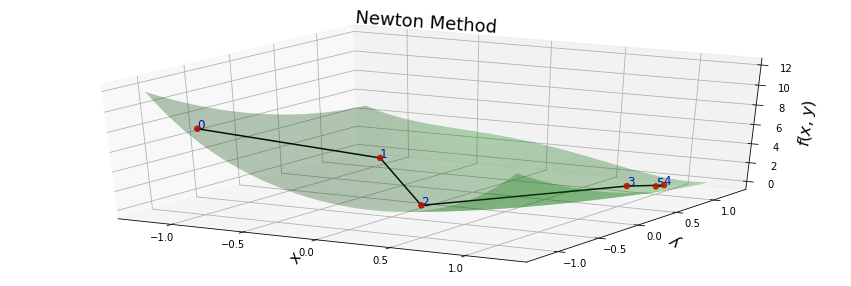

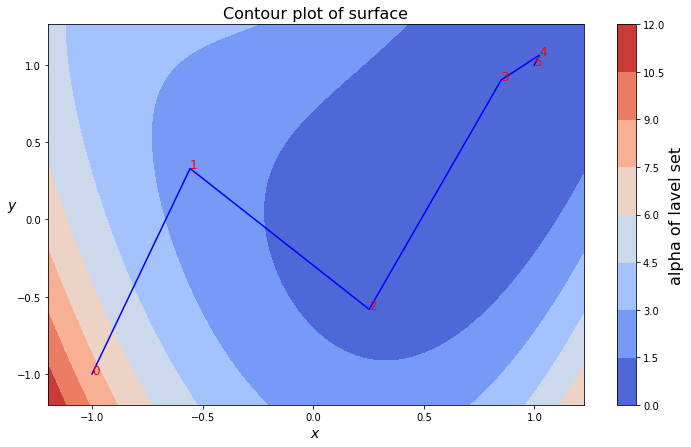

In [23]:
valN, ovfN, itersN, l0N = newton(start, LSf=LineSearchWP)
print('iteration :',itersN, ', final:', valN[-1])
ax=mythem3D(valN, ovfN)
ax=themName(ax, nmPN)
cp=mythem2D(valN[:,0], valN[:,1], 1)
cp=mythemCntr(valN[:,0], valN[:,1])
plt.show()

___

<font size=6>
Result Of 'DFP Method' for $B_{0}=I$
</font>

iteration : 8 , final: [1.01557641 1.02740522]


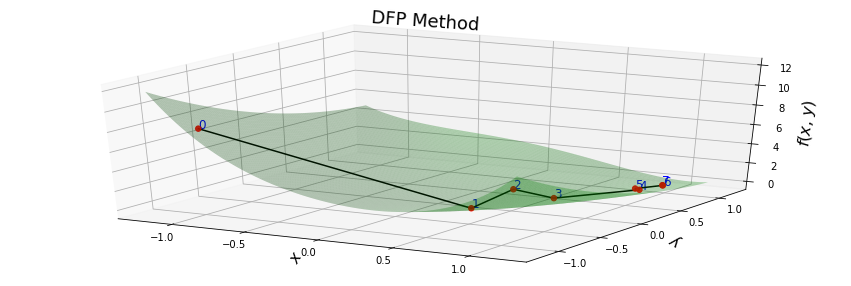

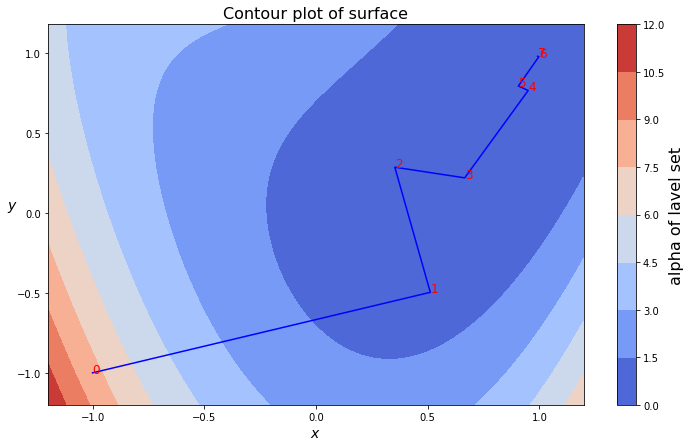

In [24]:
valxD1, valD1, ovfD1, itersD, l0D1 = DFP(start, LSf=LineSearchWP)
print('iteration :',itersD, ', final:', valD[-1])
ax=mythem3D(valD1, ovfD1)
ax=themName(ax, nmPD)
cp=mythem2D(valD1[:,0], valD1[:,1], 1)
cp=mythemCntr(valD1[:,0], valD1[:,1])
plt.show()

___

<font size=6>
Result Of 'DFP Method' for $B_{0}=H(X_{0})^{-1}$
</font>

iteration : 9 , final: [0.99973951 0.99498939]


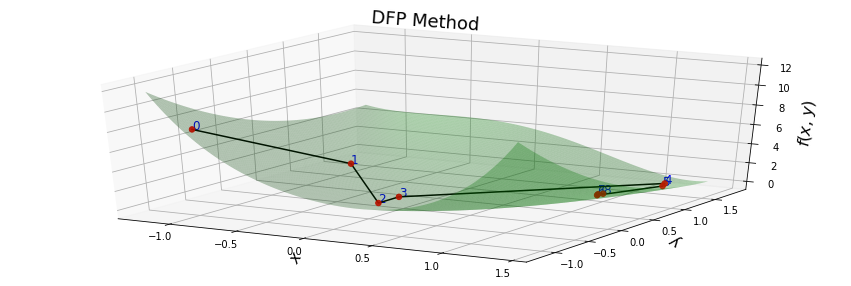

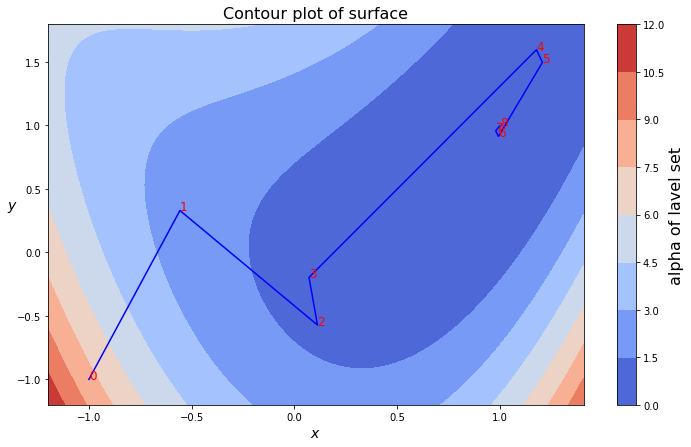

In [25]:
valxD, valD, ovfD, itersD, l0D = DFP(start, DIH=0, LSf=LineSearchWP)
print('iteration :',itersD, ', final:', valD[-1])
ax=mythem3D(valD, ovfD)
ax=themName(ax, nmPD)
cp=mythem2D(valD[:,0], valD[:,1], 1)
cp=mythemCntr(valD[:,0], valD[:,1])
plt.show()

___

<font size=3>
Here we can see that in terms of number of iteration ternds are same as last experiment that is 'Newton Method' converges earlier. "Newton Method" have converged in 6 iteration while "DFP Method with $B_{0}=I$" have converged in 8 iiteration and "DFP Method with $B_{0}=H(X_{0})^{-1}$" in 9 iteration. And solution from (i) 'Newton Method' is $X^{*}=(0.99953814, 0.99889292)$, (ii) "DFP Method with $B_{0}=I$" is $X^{*}=(1.0000774, 0.999736)$, and solution from (iii) "DFP Method with $B_{0}=H(X_{0})^{-1}$" is $X^{*}=(0.99892568, 0.99764942)$, although solutions are different but theire distance from actual solution are very-low and almost same.<br >
We can see that 'Newton Method' have entred to inner most contour in 2 iteration and it is straight in side inner most contour(No Zig-Zag). While "DFP Method with $B_{0}=I$" have entred to inner most contour in 1 iteration, but degree of <strong>"Zig-Zag"</strong> in side inner most contour is very high; And "DFP Method with $B_{0}=H(X_{0})^{-1}$" have entred to inner most contour in 2 iteration, although it has less degree of "Zig-Zag" in inner-most contour at earlir iteration, but high degree of "Zig-Zag" at nearer to solution (at the end).
</font><br ><br >

___
---
___

<font size=4>
Lets have some more Graphs and Tabes for result of Experiment 3
<font>

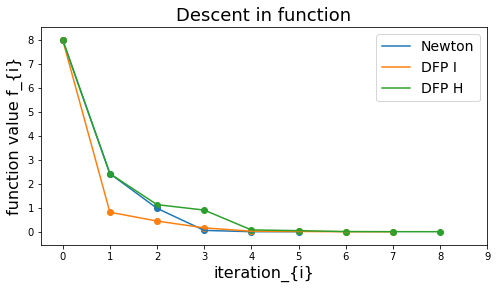

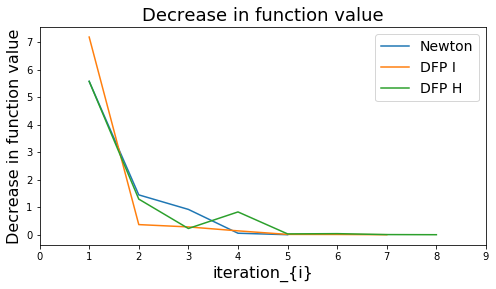

In [26]:
nmPg={'ttl':'Descent in function', 'xlbl':"iteration_{i}", 'ylbl':"function value f_{i}"}
nmPg2={'ttl':'Decrease in function value', 'xlbl':"iteration_{i}", 'ylbl':"Decrease in function value"}
lgnd=['Newton', 'DFP I', "DFP H"]
itrN=np.array([i for i in range(len(ovfN))])
itrD1=np.array([i for i in range(len(ovfD1))])
itrD=np.array([i for i in range(len(ovfD))])
ovfN2=np.array([ovfN[i-1]-ovfN[i] for i in range(1, len(ovfN))])
ovfD12=np.array([ovfD1[i-1]-ovfD1[i] for i in range(1, len(ovfD1))])
ovfD2=np.array([ovfD[i-1]-ovfD[i] for i in range(1, len(ovfD))])
fig = plt.figure(figsize=(8,4))
ax=plt.axes()
ax.plot(itrN, ovfN)
ax.scatter(itrN, ovfN)
ax.plot(itrD1, ovfD1)
ax.scatter(itrD1, ovfD1)
ax.plot(itrD, ovfD)
ax.scatter(itrD, ovfD)
ax.legend(lgnd, fontsize=14)
ax.set_xticks(np.arange(0, 10, 1))
ax.set_yticks(np.arange(0, 9, 1))
ax=themName(ax, nmPg)
fig = plt.figure(figsize=(8,4))
ax=plt.axes()
ax.plot(itrN[1:], ovfN2)
ax.plot(itrD1[1:], ovfD12)
ax.plot(itrD[1:], ovfD2)
ax.legend(lgnd, fontsize=14)
ax.set_xticks(np.arange(0, 10, 1))
ax=themName(ax, nmPg2)

<font size=3>
We can see that <br> 
(i) the value of function for "DFP Method with $B_{0}=I$" always decrease and rate of decrease is quite-rapid in initial stage.<br >
(ii) the decrease in functional value for "Newton Method" is monotonic at each iteration, but rate of decrease is not monotonic, and bit lesser-than "DFP Method with $B_{0}=I$"<br >
(ii) the decrease in functional value for "DFP Method with $B_{0}=H(X_{0})^{-1}$" is not monotinic and rate of decrease is 'Zig-Zag' and like "DFP Method with $B_{0}=I$" also it has rapid decrease in functional value at very first iteration.
</font>

---
___

In [27]:
colN=['X_i','f_i', 'd_i', 'd_i+1', "dot(d_i, d_i+1)", "arccos(d_i, d_i+1)", "arccos in degree"]
colD=['X_i','j', 'Y_ij','f_i', 'd_i', 'd_i+1', "dot(d_i, d_i+1)", "arccos(d_i, d_i+1)", "arccos (degree)"]
def dfcv(dv):
    di1=np.vstack((dv[1:], dv[-1]))
    dd=np.array([np.dot(dv[i], di1[i]) for i in range(len(dv))])
    acs=np.array([np.arccos(dd[i]/(L2(dv[i])*L2(di1[i]))) for i in range(len(dv))])
    acsdg=np.array([np.degrees(e) for e in acs])
    return (di1, dd, acs, acsdg)
def dvlx(vlx, ysz):
    xvl=[vlx[int(i/2)] for i in range(ysz)]
    jjj=[i%2 for i in range(ysz)]
    return(jjj, xvl)
pd.set_option('max_colwidth', -1)
di1, didi1, asc, ascdg=dfcv(l0N[:, 1])
NDT=pd.DataFrame(None)
LL=([e for e in valN], [round(e, 5) for e in ovfN], [e for e in l0N[:,1]], [e for e in di1], 
    [round(e, 6) for e in didi1],[round(e, 5) for e in asc], [round(e, 4 )for e in ascdg])
for i in range(len(LL)):
    NDT[colN[i]]=LL[i]
NDT.index.name='Iteration'
jj, vxD1=dvlx(valxD1, len(valD1))
di1, didi1, asc, ascdg=dfcv(l0D1[:, 1])
LL=(vxD1, jj, [e for e in valD1], [round(e, 5) for e in ovfD1], [e for e in l0D1[:,1]],
    [e for e in di1], [round(e, 6) for e in didi1],[round(e,5) for e in asc], [round(e, 4) for e in ascdg])
D1DT=pd.DataFrame(None)
for i in range(len(LL)):
    D1DT[colD[i]]=LL[i]
D1DT.index.name='Iteration'
jj, vxD=dvlx(valxD, len(valD))
di1, didi1, asc, ascdg=dfcv(l0D[:, 1])
LL=(vxD, jj, [e for e in valD], [round(e, 5) for e in ovfD], [e for e in l0D[:,1]],
    [e for e in di1],[round(e,6) for e in didi1],[round(e,4) for e in asc], [round(e,3) for e in ascdg])
DDT=pd.DataFrame(None)
for i in range(len(LL)):
    DDT[colD[i]]=LL[i]
DDT.index.name='Iteration'

---
___
<font size=5>
Table for "Newton Method"<br>
Table 1
</font>

In [28]:
NDT

,X_i,f_i,d_i,d_i+1,"dot(d_i, d_i+1)","arccos(d_i, d_i+1)",arccos in degree
Iteration,,,,,,,
0,"[-1.0, -1.0]",8.00000,"[0.3999999999999999, 1.2000000000000002]","[1.6193489089856923, -1.8228207365953688]",-1.539645,2.09349,119.9480
1,"[-0.5568685376661744, 0.3293943870014775]",2.42421,"[1.6193489089856923, -1.8228207365953688]","[0.3260217296496615, 0.8107672574177808]",-0.949940,2.03291,116.4771
2,"[0.25280591682667175, -0.5820159812962069]",0.97552,"[0.3260217296496615, 0.8107672574177808]","[0.23510167870738036, 0.21914469642399925]",0.254324,0.43818,25.1061
3,"[0.8497217479127946, 0.9024243711889106]",0.05513,"[0.23510167870738036, 0.21914469642399925]","[-0.02274560652327354, -0.06512675936117374]",-0.019620,2.65709,152.2399
4,"[1.0218976778622118, 1.0629142584059528]",0.00083,"[-0.02274560652327354, -0.06512675936117374]","[0.0004616896992235143, 0.001106528605370846]",-0.000083,3.08232,176.6039
5,"[0.9995381407907772, 0.998892919217281]",0.00000,"[0.0004616896992235143, 0.001106528605370846]","[0.0004616896992235143, 0.001106528605370846]",0.000001,0.00000,0.0000


<font size=3>
Here for iteration 4 (index wise) we can see that although dot product of $i_{th}$ and $(i+1)_{th}$ directon is very nearer to $0$ but vectors at angle of $176$ degrres; And their dot product is nearer to zero as they very close to $(0, 0)$ vector, but one is in $1_{st}$ quadrant and other is in $3_{rd}$ quadrant, which tells that at point nearer to minima (either local or global) method have electes confusing(/conflicting) direction. Also we absolute value of dotproduct is decreasing and initial directions are close to 90 degrees.
</font><br>

---
___

<br >
<font size=5>
Table for "DFP Method with $B_{0}=I$"<br>
Table 2
</font>

In [29]:
D1DT

,X_i,j,Y_ij,f_i,d_i,d_i+1,"dot(d_i, d_i+1)","arccos(d_i, d_i+1)",arccos (degree)
Iteration,,,,,,,,,
0,"[-1.0, -1.0]",0,"[-1.0, -1.0]",8.00000,"[12.0, 4.0]","[-0.3178787000479849, 1.5662778716915993]",2.450567,1.44928,83.0375
1,"[-1.0, -1.0]",1,"[0.5119889684758476, -0.4960036771747175]",0.81293,"[-0.3178787000479849, 1.5662778716915993]","[1.5233706238704026, -0.32498245116416324]",-0.993260,1.98121,113.5149
2,"[0.3530496184518552, 0.28713525867108214]",0,"[0.3530496184518552, 0.28713525867108214]",0.44495,"[1.5233706238704026, -0.32498245116416324]","[0.19717072745173794, 0.37926067047474166]",0.177111,1.30155,74.5734
3,"[0.3530496184518552, 0.28713525867108214]",1,"[0.665939715919579, 0.22038604529731462]",0.16137,"[0.19717072745173794, 0.37926067047474166]","[-0.41573422977370234, 0.27144003107644843]",0.020976,1.47180,84.3279
4,"[0.9499992806300317, 0.7667786176593535]",0,"[0.9499992806300317, 0.7667786176593535]",0.02092,"[-0.41573422977370234, 0.27144003107644843]","[0.03754689200310431, 0.07509445261670153]",0.004774,1.45602,83.4236
5,"[0.9499992806300317, 0.7667786176593535]",1,"[0.9062104042163975, 0.795369128431078]",0.00946,"[0.03754689200310431, 0.07509445261670153]","[-0.06365813590843006, 0.034109826979862756]",0.000171,1.54254,88.3812
6,"[0.9977944711807751, 0.9785388932289913]",0,"[0.9977944711807751, 0.9785388932289913]",0.00030,"[-0.06365813590843006, 0.034109826979862756]","[0.002762762811102006, 0.006351733352230991]",0.000041,1.48918,85.3235
7,"[0.9977944711807751, 0.9785388932289913]",1,"[0.9921686420496646, 0.9815533713556599]",0.00007,"[0.002762762811102006, 0.006351733352230991]","[0.002762762811102006, 0.006351733352230991]",0.000048,0.00000,0.0000


<font size=3>
Here we can see that directions are almost close to $90$ degrees, and dot product value is decreasing in nature in latter iterations.<br >
So we can say that Method elects to move orthogonal.
</font>

---
___

<font size=5>
Table for "DFP Method with $B_{0}=H(X_{0})^{-1}$"<br>
Table 3
</font>

In [30]:
DDT

,X_i,j,Y_ij,f_i,d_i,d_i+1,"dot(d_i, d_i+1)","arccos(d_i, d_i+1)",arccos (degree)
Iteration,,,,,,,,,
0,"[-1.0, -1.0]",0,"[-1.0, -1.0]",8.00000,"[0.3999999999999999, 1.2000000000000002]","[0.3750442592221738, -0.5049786648501201]",-0.455957,2.1810,124.964
1,"[-1.0, -1.0]",1,"[-0.5568685376661744, 0.3293943870014775]",2.42421,"[0.3750442592221738, -0.5049786648501201]","[-0.08289136893204366, 0.7506962309435654]",-0.410174,2.6128,149.700
2,"[0.11274164256492525, -0.5722028151112408]",0,"[0.11274164256492525, -0.5722028151112408]",1.12935,"[-0.08289136893204366, 0.7506962309435654]","[0.08098069979743532, 0.13109058167351817]",0.091697,0.6633,38.007
3,"[0.11274164256492525, -0.5722028151112408]",1,"[0.07129595809890342, -0.19685469963945812]",0.90327,"[0.08098069979743532, 0.13109058167351817]","[0.14429166789372477, -0.49514672361638457]",-0.053224,2.3047,132.048
4,"[1.178565331489759, 1.5955796284185007]",0,"[1.178565331489759, 1.5955796284185007]",0.07455,"[0.14429166789372477, -0.49514672361638457]","[-0.008044906719425753, -0.021910153579998197]",0.009688,0.6355,36.409
5,"[1.178565331489759, 1.5955796284185007]",1,"[1.207680198993944, 1.49566996999082]",0.04451,"[-0.008044906719425753, -0.021910153579998197]","[-0.05816698146829194, 0.19083804574376778]",-0.003713,2.4938,142.887
6,"[0.9937498930797972, 0.9130347671889245]",0,"[0.9937498930797972, 0.9130347671889245]",0.00559,"[-0.05816698146829194, 0.19083804574376778]","[0.0009573251842415968, 0.0018484100277339534]",0.000297,0.7737,44.332
7,"[0.9937498930797972, 0.9130347671889245]",1,"[0.9802437038063079, 0.9573467583106092]",0.00040,"[0.0009573251842415968, 0.0018484100277339534]","[-0.003539188048421104, 0.011568069196181427]",0.000018,0.7748,44.392
8,"[0.999739506912781, 0.9949893885828713]",0,"[0.999739506912781, 0.9949893885828713]",0.00002,"[-0.003539188048421104, 0.011568069196181427]","[-0.003539188048421104, 0.011568069196181427]",0.000146,0.0000,0.000


<font size=3>
Here for iteration 6 we can see that although dot product is very nearer to $0$ but direction vectors are at angle of nearly $45$ degrres; And their dot product nearer to zero as they are very close to $(0, 0)$ vector, but one is In $1_{st}$ quadrant and other is in $2_{nd}$ quadrant, which tells that at point nearer to minima (either local or global) method have elected to move straight.<br > Also we can see that absolute of dotproduct is decreasing in latter iterations.
</font>

___
---
---

<font size=5><center>Thanks!</center></font>

---
---
___
---
